# Python para finanças - alocação e otimização de portfólios

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

Date        GOL    CVC       WEGE       MGLU       TOTS       BOVA
0     2015-01-02  14.990000  15.20  11.846200   0.232812  35.732101  47.259998
1     2015-01-05  14.850000  15.00  11.926900   0.237187  34.634201  46.320000
2     2015-01-06  15.210000  14.80  11.750000   0.234062  32.468300  46.580002
3     2015-01-07  14.550000  14.67  11.615400   0.241875  32.238701  48.150002
4     2015-01-08  14.270000  14.15  11.811500   0.240000  32.987301  48.509998
...          ...        ...    ...        ...        ...        ...        ...
1441  2020-10-27  18.600000  14.17  83.239998  25.450001  28.500000  95.800003
1442  2020-10-28  16.920000  12.77  79.139999  24.629999  27.500000  92.430000
1443  2020-10-29  16.610001  12.68  80.029999  25.360001  28.500000  92.910004
1444  2020-10-30  15.690000  12.28  75.830002  24.629999  27.000000  90.660004
1445  2020-11-03  16.070000  12.42  78.669998  25.309999  27.930000  92.410004

[1446 rows x 7 columns]

## Alocação aleatória de ativos

In [ ]:
len(dataset.columns) - 1

6

In [ ]:
dataset.loc[len(dataset) - 1]['BOVA']

92.41000366210938

In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)

In [ ]:
dataset

GOL        CVC  ...     soma valor  taxa retorno
0     1330.859777  35.806036  ...    5000.000000      0.000000
1     1318.430187  35.334904  ...    4984.683405     -0.306332
2     1350.392100  34.863773  ...    4932.501791     -1.046839
3     1291.795217  34.557537  ...    4911.893321     -0.417810
4     1266.935952  33.332592  ...    4914.476924      0.052599
...           ...        ...  ...            ...           ...
1441  1651.367094  33.379707  ...  152076.270736     -0.066212
1442  1502.211333  30.081783  ...  146943.023813     -3.375442
1443  1474.688596  29.869773  ...  151076.641685      2.813075
1444  1393.007983  28.927508  ...  146500.615560     -3.028944
1445  1426.745600  29.257301  ...  150607.258460      2.803157

[1446 rows x 8 columns]

In [ ]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1441    2020-10-27
1442    2020-10-28
1443    2020-10-29
1444    2020-10-30
1445    2020-11-03
Name: Date, Length: 1446, dtype: object

In [ ]:
acoes_pesos

Ações      Pesos
0   GOL  26.617196
1   CVC   0.716121
2  WEGE  21.866313
3  MGLU  25.840174
4  TOTS  17.202779
5  BOVA   7.757418

In [ ]:
soma_valor

150607.25846015807

## Visualização dos dados

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [ ]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

29.121451692031616

### Desvio padrão

In [ ]:
dataset['taxa retorno'].std()

2.8167443147613374

### Sharpe ratio

In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

1.5341112767145668

In [ ]:
dinheiro_total = 5000

In [ ]:
soma_valor - dinheiro_total

145607.25846015807

In [ ]:
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [ ]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [ ]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [ ]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [ ]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [ ]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [ ]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [ ]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

3246.472060659764

In [ ]:
ir = rendimentos * 15 / 100
ir

486.9708090989646

In [ ]:
valor_2020 - ir

7759.5012515608

In [ ]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean() / 100

0.08791666666666666

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

1.044567717879135

# Observação feita por um prossional da área de finanças sobre a forma de cálculo de Sharpe ratio
"A taxa de Selic é a media de determinadas operações considerando a liquidez diária das mesma. Se todas elas estiverem, no mesmo padrão, no caso, considerando a taxa mensal, anual ou diária. O retorno da carteira calculado anualizado está na mesma forma do cálculo do sharpe ratio que faz sentido. O único dado que está um pouco desconexo é o desvio padrão ser calculado pela base diária e não pelo valor da taxa anual."

No momento não esta programada uma atualização na estrutura do curso.

## Otimização de portfólio - randômico

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [ ]:
import sys
1 - sys.maxsize

-9223372036854775806

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0
  
  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)
    
    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 1000)

In [ ]:
sharpe_ratio, melhores_pesos

(1.5619692345460763,
 array([0.00414986, 0.04300667, 0.23449471, 0.34400729, 0.09446242,
        0.27987905]))

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

In [ ]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0   GOL   0.414986
 1   CVC   4.300667
 2  WEGE  23.449471
 3  MGLU  34.400729
 4  TOTS   9.446242
 5  BOVA  27.987905, 198082.38267450326)

In [ ]:
print(ls_retorno)

[0.2700275714598437, 0.5468515787495574, 0.3212721424787289, 0.5022743823458818, 0.4548274888464415, 0.5398113929191143, 0.5549806485796855, 0.33773541881325925, 0.46286949549920287, 0.5342248042722894, 0.6463871106687636, 0.20612923748944986, 0.5006090986384015, 0.4623874098965904, 0.6323088806642341, 0.4805174213367298, 0.5881936437125228, 0.5349072746824675, 0.4135701071103463, 0.5732898167594592, 0.3084630942201833, 0.5819199748805743, 0.543875079823675, 0.4968989492065007, 0.5976026598833581, 0.5379316606689509, 0.5696453756556061, 0.5307732273617857, 0.397081887184388, 0.11398691755756181, 0.49774458218660056, 0.4560348124189272, 0.5682784635789176, 0.5552662881095234, 0.4239667812074227, 0.3357110527775064, 0.5027869715697358, 0.5540565066835222, 0.49147572280600355, 0.49117309960420913, 0.41941313180884227, 0.41668706146764434, 0.28858213070264827, 0.5790423004576727, 0.3500870312157811, 0.17709747637621542, 0.4424244236318082, 0.6198388330427766, 0.5315516521419436, 0.51088494

In [ ]:
print(ls_volatilidade)

[0.34559109383735054, 0.3369552655508682, 0.40383576034927127, 0.3521230340007986, 0.40388090520644276, 0.3621335934514903, 0.3584399240420494, 0.38874883734372495, 0.3564379693839108, 0.41326367849474316, 0.3872226743959293, 0.35390316819249995, 0.4062213209295674, 0.34793695206266495, 0.4215466328083608, 0.40046136068385574, 0.35708362499629875, 0.3885751377467397, 0.3789182222834081, 0.3794427739502363, 0.3037942450244161, 0.34500250514108394, 0.3403751370523641, 0.4245987776503987, 0.37437934825799557, 0.4448175523143702, 0.34141777933625933, 0.3747448565717098, 0.36351432802710265, 0.3818408172036827, 0.39203623801947696, 0.3101161553532157, 0.3385773457096267, 0.34471451544876475, 0.344641869825529, 0.2806382034674432, 0.34413964741890907, 0.366953404850524, 0.3581501995474015, 0.3274489318501969, 0.35419809214530207, 0.3829765128996306, 0.4040274252128353, 0.3974740955798951, 0.4158483318147269, 0.4000757488235048, 0.42742724656929115, 0.40299152053789106, 0.4327737222677917, 0.

In [ ]:
print(ls_sharpe_ratio)

[0.5269548551470657, 1.3620054618603608, 0.5778474784160688, 1.1767412968453392, 0.9084629093624251, 1.247867456717962, 1.30304676065668, 0.6426225062268346, 1.0519441278397688, 1.0799597468406599, 1.4422462343490492, 0.33402518385617663, 1.0159300132926539, 1.0762603425993107, 1.291416350240552, 0.9803711249435669, 1.4010078929019545, 1.1503324958148362, 0.8594293472645673, 1.279173523426879, 0.7259730266970371, 1.4318832496937723, 1.3395761426806643, 0.9632205839192904, 1.3614158889593777, 1.0116844348000027, 1.410965503687168, 1.1817548738267356, 0.8504897790292075, 0.0682751809558083, 1.045382737040684, 1.187033114521176, 1.4187653220136665, 1.355758462432138, 0.9750704831971738, 0.8829674044702411, 1.2055289415638362, 1.2702970836494472, 1.1267871877478195, 1.2315093857811892, 0.935906975484742, 0.8584609857971653, 0.4966629775943408, 1.2356167087429382, 0.6304470752714703, 0.2229098113839719, 0.8293990610345228, 1.319933892569574, 1.0250968639005409, 1.1047539144237246, 1.4396720

In [ ]:
melhor_retorno, melhor_volatilidade

(0.6259296653087537, 0.34444532372523906)

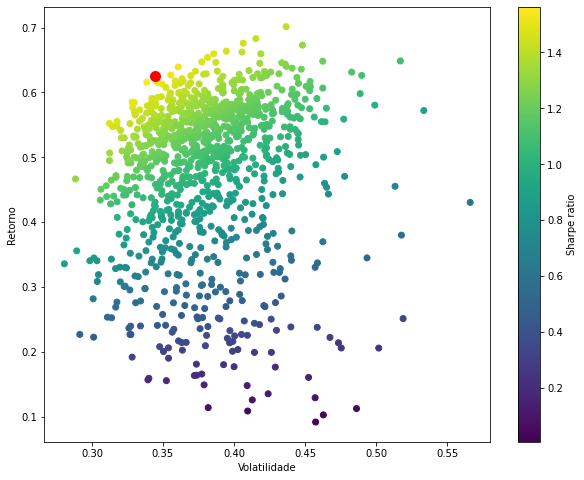

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [ ]:
!pip install mlrose

In [ ]:
import mlrose

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [ ]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [ ]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [ ]:
fitness_function(pesos)

1.044567717879135

In [ ]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [ ]:
visualiza_alocacao(pesos)

GOL 26.617195545614496
CVC 0.7161207195395352
WEGE 21.866313475981215
MGLU 25.84017365648649
TOTS 17.202779081759033
BOVA 7.757417520619242


In [ ]:
fitness = mlrose.CustomFitness(fitness_function)

In [ ]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [ ]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

### Hill climb

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
melhor_solucao, melhor_custo

(array([0.        , 0.22032449, 0.10011437, 0.90233257, 0.        ,
        0.        ]), 1.270681157037088)

In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.18018453, 0.08187497, 0.7379405 , 0.        ,
        0.        ]), 0.9999999999999999)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 18.018452678413226
WEGE 8.187496981804403
MGLU 73.79405033978236
TOTS 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

404578.3008863211

In [ ]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.        , 0.32032449, 0.        , 0.        , 0.64675589,
        0.49233859]), -0.3966947924158746)

In [ ]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.        , 0.21948769, 0.        , 0.        , 0.44315985,
        0.33735247]), 0.9999999999999999)

In [ ]:
visualiza_alocacao(pior_solucao)

GOL 0.0
CVC 21.94876851988625
WEGE 0.0
MGLU 0.0
TOTS 44.31598465629341
BOVA 33.73524682382033


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor

5926.919066862072

### Simulated annealing

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.        , 0.15384615, 0.15384615, 0.69230769, 0.        ,
        0.        ]), 1.2707841514378275)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 15.384615384615389
WEGE 15.384615384615389
MGLU 69.23076923076923
TOTS 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

382055.77815722366

### Algoritmo genético

In [ ]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length = 6, fitness_fn = fitness, 
                                               maximize = True, min_val = 0.1, max_val = 1)

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.05486587, 0.15198019, 0.09752971, 0.54073661, 0.06577971,
        0.08910791]), 1.2323078658475695)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 5.4865870615535615
CVC 15.19801923856264
WEGE 9.752971254516094
MGLU 54.07366085916957
TOTS 6.577970925624096
BOVA 8.91079066057405


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

299210.8074659617

## Exercício

In [ ]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

Date      AMBEV  ODONTOPREV  ...  PETROBRAS    BBRASIL       BOVA
0     2015-01-02  16.020000        9.37  ...   9.000000  22.650000  47.259998
1     2015-01-05  15.730000        9.62  ...   8.270000  22.180000  46.320000
2     2015-01-06  16.330000        9.55  ...   8.060000  22.490000  46.580002
3     2015-01-07  16.559999        9.69  ...   8.450000  23.480000  48.150002
4     2015-01-08  16.540001        9.66  ...   9.020000  23.559999  48.509998
...          ...        ...         ...  ...        ...        ...        ...
1441  2020-10-27  13.720000       14.00  ...  19.860001  32.779999  95.800003
1442  2020-10-28  13.370000       12.97  ...  18.639999  31.139999  92.430000
1443  2020-10-29  12.890000       12.84  ...  19.330000  30.959999  92.910004
1444  2020-10-30  12.180000       12.61  ...  19.000000  29.799999  90.660004
1445  2020-11-03  12.670000       12.51  ...  19.690001  30.120001  92.269997

[1446 rows x 7 columns]

In [ ]:
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(dataset_original, 5000, 
                                                                 taxa_selic_historico.mean() / 100, 
                                                                 1000)

In [ ]:
sharpe_ratio

0.05505740067009893

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhores_pesos)

In [ ]:
acoes_pesos, soma_valor

(        Ações      Pesos
 0       AMBEV   0.260490
 1  ODONTOPREV  15.712115
 2        VIVO   4.974127
 3   PETROBRAS  34.874414
 4     BBRASIL   4.999848
 5        BOVA  39.179006, 9312.446933470927)

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.11285100663655298
AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.0
PETROBRAS 100.0
BBRASIL 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

10938.889185587564

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.06892814399053493
AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.0
PETROBRAS 83.33333333333333
BBRASIL 0.0
BOVA 16.66666666666668


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

10742.733510208742

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

-0.11990688158739486
AMBEV 5.459253062007656
ODONTOPREV 5.723100686674163
VIVO 11.16523150400342
PETROBRAS 45.20355156345249
BBRASIL 7.548995174711988
BOVA 24.899868009150286


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

9106.821255365567